In [1]:
import math
import numpy as np
from numpy import random
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, SpectralClustering, OPTICS

In [2]:
def read_points(point_count):
    return pd.read_csv("data/points_" + str(point_count).zfill(4) + ".csv", dtype={'label': str})

In [3]:
# Functions to perform clustering

def cluster_points_by_dbscan(short_edge_dim, points):
#     clustering = DBSCAN(eps=0.05 * short_edge_dim, min_samples=2).fit(points)
#     clustering = DBSCAN(eps=25, min_samples=2).fit(points)
    clustering = OPTICS(cluster_method='dbscan', eps=25, min_samples=2).fit(points)
    points['cluster'] = clustering.labels_
    return points

def consolidate_clusters(points):
    cluster_nos = list(set(points.cluster))
    labels, X, Y, cluster_points, counts = [], [], [], [], []
    
    for i in range(0, len(cluster_nos)-1):
        c = cluster_nos[i]
        labels.append('-')
        X.append(points[points.cluster == c].x.mean())
        Y.append(points[points.cluster == c].y.mean())
        cluster_points.append(points[points.cluster == c].label.str.cat(sep=', '))
        counts.append(len(points[points.cluster == c]))
        
    df = pd.DataFrame(zip(labels, X, Y, cluster_points, counts), 
                      columns=['label','x','y','cluster_points','count'])
    
    df['bin_x'] = [int(x/100) for x in df.x]
    df['bin_y'] = [int(y/100) for y in df.y]
    df = df.sort_values(by=['bin_x','y'], ignore_index=True)
    df['label'] = ['#'+str(i+1) for i in range(len(df))]
        
    return df 

In [4]:
# Functions to plot points and labels

def plot_result(img, points, clusters):
    dpi = 100
    margin = 0.02
    w = (1+2*margin) * img.shape[1] / float(dpi)
    h = (1+2*margin) * img.shape[0] / float(dpi)
    fig = plt.figure(figsize=(w, h), dpi=dpi)
    ax = fig.add_axes([margin, margin, 1/(1+2*margin), 1/(1+2*margin)])
    ax.axis('off')
    
    # Plot point marks    
    ax.scatter(points.x, points.y, c=points.cluster, s=30, marker="o", cmap="tab20")
    
    # Plot independent point labels
    for i in range(len(points)):
        if points.cluster[i] == -1:
            ax.text(points.x[i], points.y[i]-10, points.label[i], fontsize=8, 
                    ha='center', va='baseline',
                    bbox=dict(boxstyle='round', pad=0.2, facecolor='white', alpha=0.9))

    # Plot cluster labels
    for i in range(len(clusters)):
        ax.text(clusters.iloc[i].x, clusters.iloc[i].y, clusters.iloc[i].label, fontsize=10, weight='bold',
                ha='center', va='baseline',
                bbox=dict(boxstyle='round', pad=0.4, facecolor='red', alpha=0.5))
    
    # Plot the floor plan
    ax.imshow(img)
    #plt.savefig('output/result_' + str(len(points)) + '.png')
    plt.show()

In [5]:
# Function to execute a single program flow for floorplan point clustering with given "point_count".

def run(point_count):
    print("Point Count = " + str(point_count))
    print('==================')
    
    img = mpimg.imread("floorplan.png")
    dim_x, dim_y = img.shape[1], img.shape[0]
    points = read_points(point_count)
    
    short_edge_dim = dim_x if dim_x < dim_y else dim_y
    points = cluster_points_by_dbscan(short_edge_dim, points)
    clusters = consolidate_clusters(points)

    plot_result(img, points, clusters) 
    print(clusters[['label', 'cluster_points', 'count']].to_string(index=False))
    print('\n\n\n')

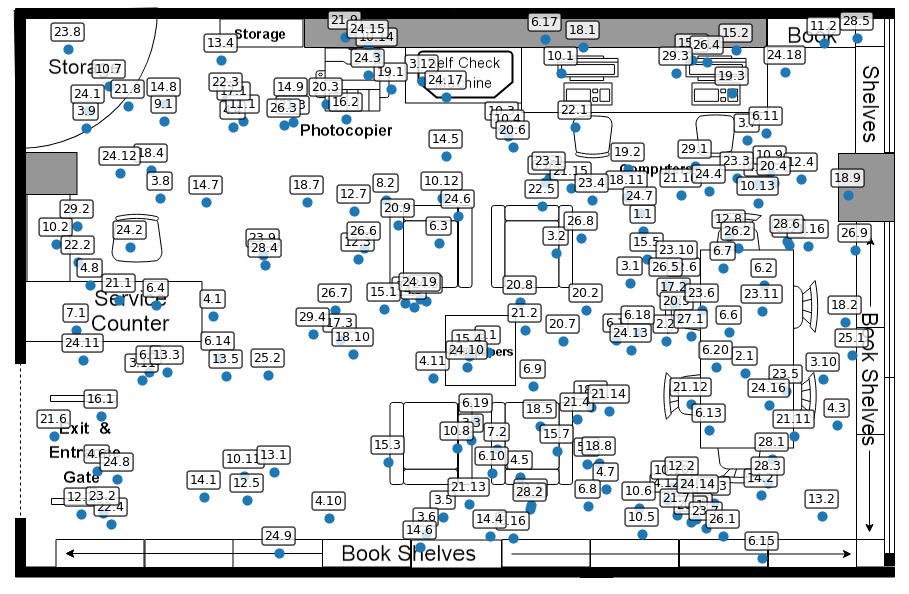

In [6]:
Image.open('output/problem_200.png')

Point Count = 100


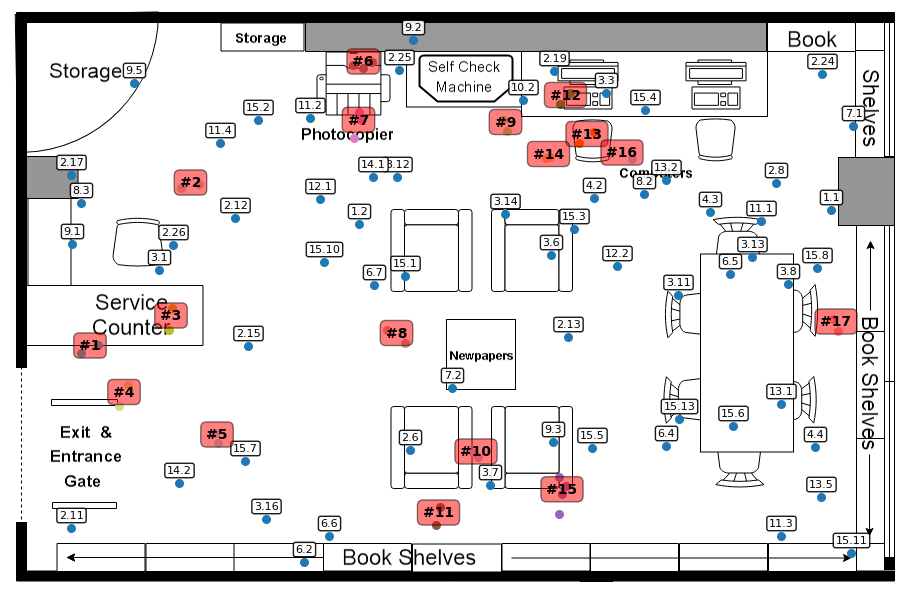

label         cluster_points  count
   #1              2.9, 2.16      2
   #2             6.1, 15.14      2
   #3              3.4, 3.15      2
   #4              2.5, 10.3      2
   #5              3.10, 4.1      2
   #6        2.23, 3.17, 9.4      3
   #7        2.4, 3.9, 15.15      3
   #8              1.3, 2.21      2
   #9               3.2, 6.3      2
  #10              2.27, 5.1      2
  #11             8.1, 15.12      2
  #12              2.2, 13.4      2
  #13              3.5, 13.3      2
  #14              2.7, 2.22      2
  #15 2.10, 2.18, 2.20, 10.1      4
  #16              2.3, 2.14      2
  #17              2.1, 15.9      2






In [7]:
run(100)

Point Count = 25


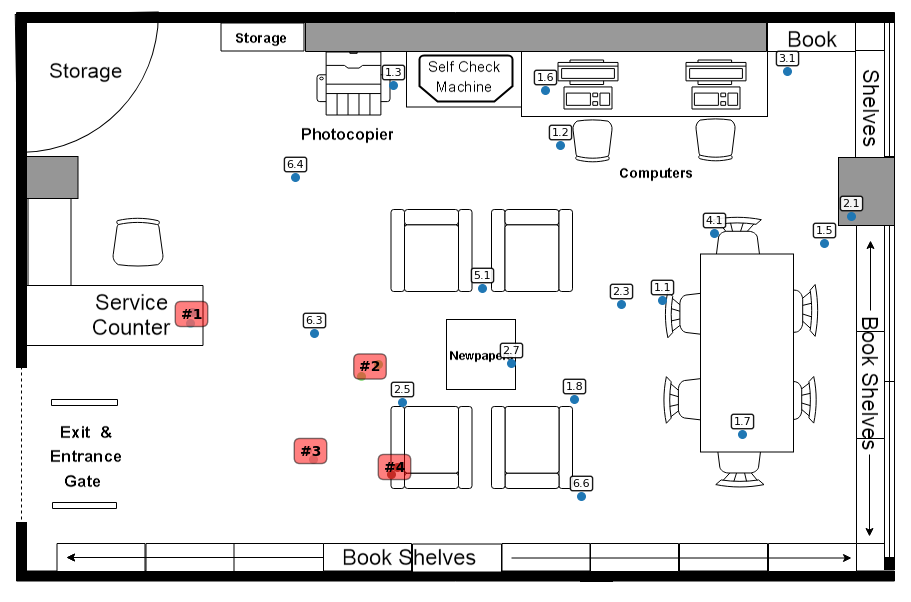

label cluster_points  count
   #1       6.1, 6.7      2
   #2       1.4, 2.4      2
   #3       2.6, 6.2      2
   #4       2.2, 6.5      2




Point Count = 50


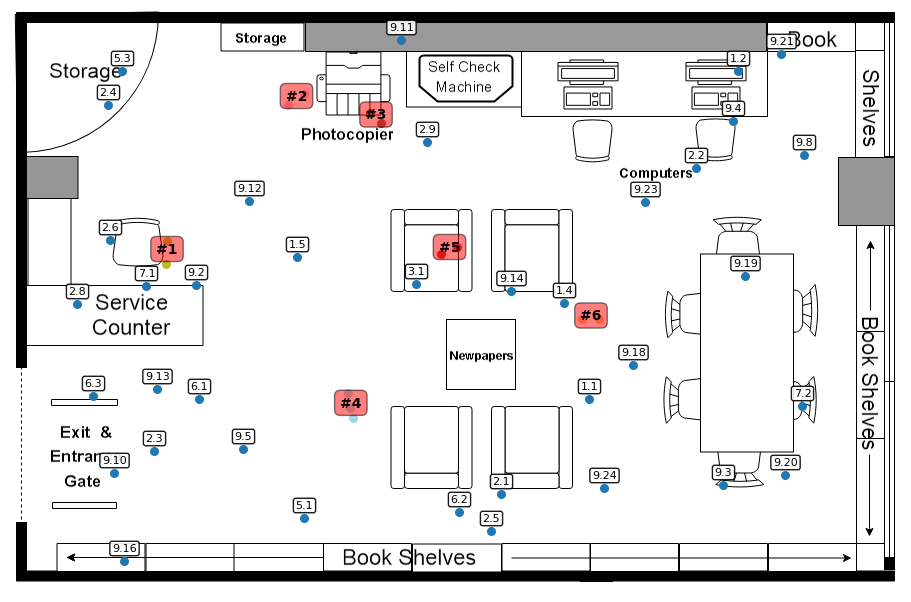

label cluster_points  count
   #1      9.9, 9.22      2
   #2       2.7, 9.7      2
   #3       1.3, 5.2      2
   #4 8.1, 9.1, 9.15      3
   #5      1.6, 9.17      2
   #6       4.1, 9.6      2




Point Count = 100


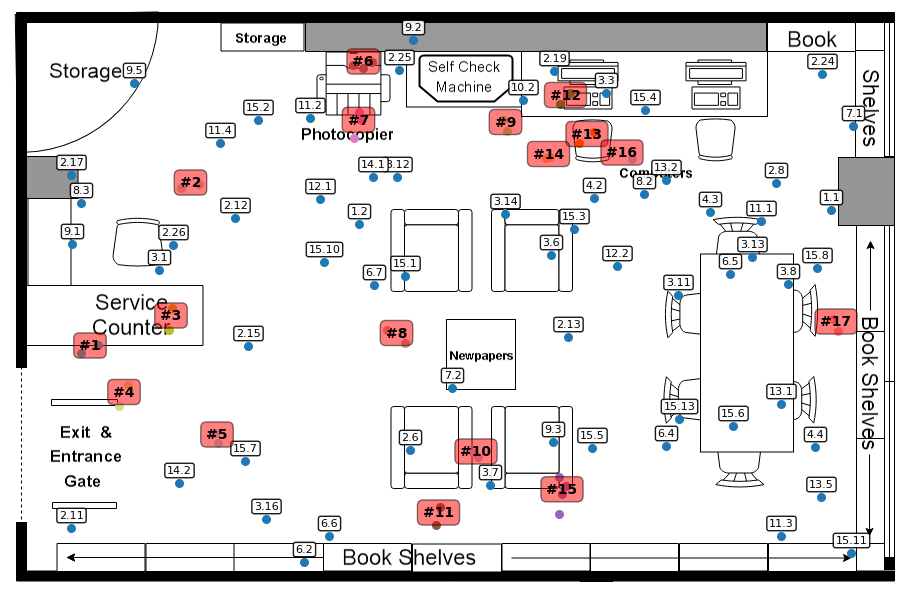

label         cluster_points  count
   #1              2.9, 2.16      2
   #2             6.1, 15.14      2
   #3              3.4, 3.15      2
   #4              2.5, 10.3      2
   #5              3.10, 4.1      2
   #6        2.23, 3.17, 9.4      3
   #7        2.4, 3.9, 15.15      3
   #8              1.3, 2.21      2
   #9               3.2, 6.3      2
  #10              2.27, 5.1      2
  #11             8.1, 15.12      2
  #12              2.2, 13.4      2
  #13              3.5, 13.3      2
  #14              2.7, 2.22      2
  #15 2.10, 2.18, 2.20, 10.1      4
  #16              2.3, 2.14      2
  #17              2.1, 15.9      2




Point Count = 200


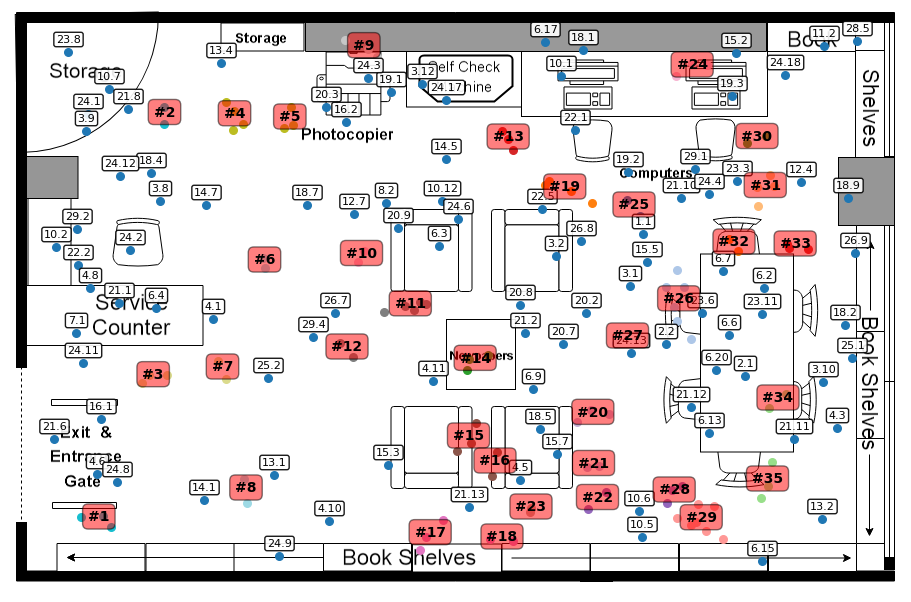

label                            cluster_points  count
   #1                          12.1, 22.4, 23.2      3
   #2                                 9.1, 14.8      2
   #3                           3.11, 6.5, 13.3      3
   #4                     4.4, 11.1, 17.1, 22.3      4
   #5                          14.9, 21.3, 26.3      3
   #6                                23.9, 28.4      2
   #7                                6.14, 13.5      2
   #8                               10.11, 12.5      2
   #9                        10.14, 21.9, 24.15      3
  #10                                12.3, 26.6      2
  #11               3.4, 4.9, 15.1, 24.5, 24.19      5
  #12                               17.3, 18.10      2
  #13                          10.3, 10.4, 20.6      3
  #14                          8.1, 15.4, 24.10      3
  #15                           3.3, 6.19, 10.8      3
  #16                                 6.10, 7.2      2
  #17                            3.5, 3.6, 14.6      3
  #18     

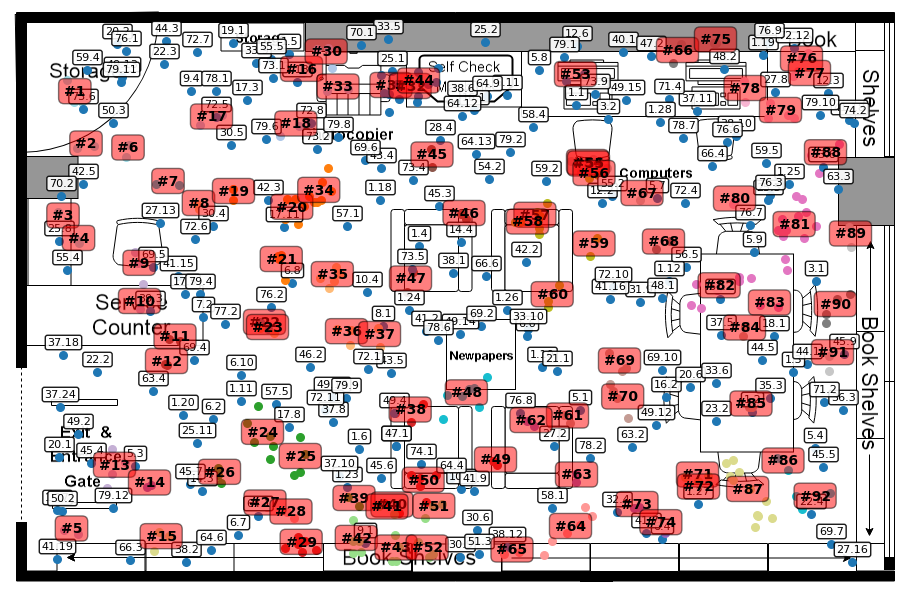

label                                                           cluster_points  count
   #1                                                        27.7, 27.9, 38.11      3
   #2                                                               25.6, 38.9      2
   #3                                                               41.6, 44.4      2
   #4                                                                1.22, 7.3      2
   #5                                                               79.3, 79.7      2
   #6                                                                5.6, 20.4      2
   #7                                                               57.3, 59.6      2
   #8                                                                8.2, 10.3      2
   #9                                                         32.1, 35.2, 47.8      3
  #10                                                               63.8, 64.5      2
  #11                                                 

In [8]:
# Main Program Flow
run(25)
run(50)
run(100)
run(200)
run(500)